In [14]:
# LSTM for closing bitcoin price with regression framing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import os

#Files
from util import fetchOnlineData

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [15]:
# convert an array of values into a dataset matrix
def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset)-1):
        dataX.append(dataset[i])
        dataY.append(dataset[i + 1])
    return np.asarray(dataX), np.asarray(dataY)
# fix random seed for reproducibility
np.random.seed(7)

# Initial variables

In [16]:
symbol = "AABA"

# We'll look back 365 days
start_d = dt.date.today() - dt.timedelta(365)

# Importing dataset

In [17]:
yesterday = dt.date.today() - dt.timedelta(1)
dataset = fetchOnlineData(start_d, symbol, yesterday, del_cols=False)

[*********************100%***********************]  1 of 1 downloaded


In [18]:
# load the dataset
df = dataset.drop(['Open','High','Low','Volume', 'Close'], axis=1)
dataset = df.values
dataset = dataset.astype('float32')

In [19]:
dataset.size

251

In [20]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [21]:
#prepare the X and Y label
X,y = create_dataset(dataset)
#Take 80% of data as the training sample and 20% as testing sample
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.20, shuffle=False)

In [22]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [23]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [24]:
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
 - 16s - loss: 0.2043
Epoch 2/5
 - 2s - loss: 0.0395
Epoch 3/5
 - 3s - loss: 0.0197
Epoch 4/5
 - 2s - loss: 0.0169
Epoch 5/5
 - 2s - loss: 0.0142


In [34]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
print(type(testPredict))
futurePredict = model.predict(np.asarray([[testPredict[-1]]]))
futurePredict = scaler.inverse_transform(futurePredict)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

<class 'numpy.ndarray'>


In [35]:
print("Price for last 5 days: ")
print(testPredict[-5:])
print("Price for tomorrow: ", futurePredict)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Price for last 5 days: 
[[67.15907 ]
 [67.09045 ]
 [67.647064]
 [68.25412 ]
 [68.25412 ]]
Price for tomorrow:  [[69.78348]]
Train Score: 53050.47 RMSE
Test Score: 46074.61 RMSE


In [28]:
# Save model for later use
model.save('./lstm_model')

In [29]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[1:len(trainPredict)+1, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict):len(dataset)-1, :] = testPredict


In [30]:
# Create final dataframe
index = df.index
comp = pd.DataFrame(index=index)
comp['Real price'] = scaler.inverse_transform(dataset)
comp['Train Pred'] = trainPredictPlot
comp['Test Pred'] = testPredictPlot                                              

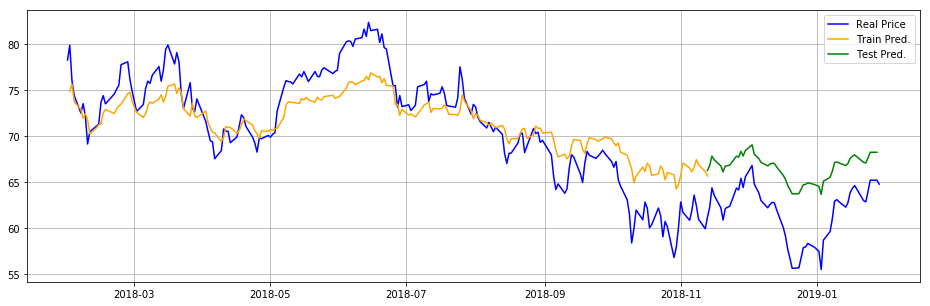

In [31]:
plt.figure(figsize=(16,5))
plt.plot(comp['Real price'], color='blue', label='Real Price')
plt.plot(comp['Train Pred'], color='orange', label='Train Pred.')
plt.plot(comp['Test Pred'], color='green', label='Test Pred.')

plt.legend()
plt.grid()
plt.show()

In [ ]:
type(testPredict)

# Future predictions

In [65]:
#load_model
model = load_model('./lstm_model')

In [66]:
# Next Bussiness day
start = future_df.index[-1]
end = start + dt.timedelta(7)
next_bussiness_day = pd.date_range(start, end, freq='BM')

# Initial variables

In [67]:
symbol = "AABA"

# We'll look back 365 days
start_d = dt.date.today() - dt.timedelta(365)

# Importing dataset

In [68]:
yesterday = dt.date.today() - dt.timedelta(1)
dataset = fetchOnlineData(start_d, symbol, yesterday, del_cols=False)

[*********************100%***********************]  1 of 1 downloaded


In [69]:
# load the dataset
df = dataset.drop(['Open','High','Low','Volume', 'Close'], axis=1)
dataset = df.values
dataset = dataset.astype('float32')

In [70]:
dataset.size

251

In [71]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [72]:
#prepare the X and Y label
X,y = create_dataset(dataset)
#Take 80% of data as the training sample and 20% as testing sample
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.20, shuffle=False)

In [73]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [75]:
testPredict = model.predict(testX)

In [76]:
futurePredict = model.predict(np.asarray([[testPredict[-1]]]))
futurePredict = scaler.inverse_transform(futurePredict)

In [79]:
futurePredict.item(0)

69.78347778320312